In [1]:
import pandas as pd

# Load the dataset
cols = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/var_names.csv")
data = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/CSCS_data_anon.csv",
                   na_values=["9999", "", " ", "Presented but no response", "NA"])

# Remove empty columns
empty = (data.isna().sum() == data.shape[0])
data = data[empty.index[~empty]]

# Keep only the recommended data
dataV2 = data[data.REMOVE_case == 'No'].copy()

# Select participants who are part of the cohort data
dataV2_cohort = dataV2[dataV2.SURVEY_cohort_participant].copy()

# Remove year 2023
dataV2_cohortV2 = dataV2_cohort[dataV2_cohort.SURVEY_collection_year != 2023].copy()

# Remove columns with too many missing values
missingness_limit = 100
columns2keep = dataV2_cohortV2.isna().sum() < missingness_limit
columns2keep = columns2keep.index[columns2keep]
dataV2_cohortV3 = dataV2_cohortV2[columns2keep].copy()

# Select only the requested columns
selected_columns = [
    "CONNECTION_activities_checked_in_p3m",
    "CONNECTION_activities_computer_games_p3m",
    "CONNECTION_activities_discussion_group_p3m",
    "CONNECTION_activities_group_video_chat_p3m",
    "CONNECTION_activities_onlinegames_p3m",
    "CONNECTION_activities_phone_p3m",
    "CONNECTION_activities_text_or_messaged_p3m",
    "CONNECTION_activities_video_chat_p3m",
    "CONNECTION_activities_board_games_p3m",
    "CONNECTION_activities_church_p3m",
    "CONNECTION_activities_coffee_p3m",
    "CONNECTION_activities_community_p3m",
    "CONNECTION_activities_helped_p3m",
    "CONNECTION_activities_hug_p3m",
    'WELLNESS_subjective_happiness_scale_score',
    'WELLNESS_phq_score', 
    'WELLNESS_gad_score'
]

filtered_data = dataV2_cohortV3[selected_columns]

filtered_data = filtered_data.dropna(
    subset=["WELLNESS_subjective_happiness_scale_score", "WELLNESS_phq_score", "WELLNESS_gad_score"]
)

filtered_data.fillna("Not in the past three months", inplace=True)

# The resulting data
filtered_data


/tmp/ipykernel_86/1548724810.py:5: DtypeWarning: Columns (129,408,630,671,689,978,1001,1002,1006,1007,1008,1080,1113,1115,1116,1117,1118,1119,1120,1121,1124,1125,1126,1127,1128,1213,1214,1215,1216,1217,1218,1263,1266,1342,1343,1344,1345,1346,1347,1348,1349,1390,1391,1393,1439,1442,1463,1546,1549,1552,1555,1558,1561) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/CSCS_data_anon.csv",


,CONNECTION_activities_checked_in_p3m,CONNECTION_activities_computer_games_p3m,CONNECTION_activities_discussion_group_p3m,CONNECTION_activities_group_video_chat_p3m,CONNECTION_activities_onlinegames_p3m,CONNECTION_activities_phone_p3m,CONNECTION_activities_text_or_messaged_p3m,CONNECTION_activities_video_chat_p3m,CONNECTION_activities_board_games_p3m,CONNECTION_activities_church_p3m,CONNECTION_activities_coffee_p3m,CONNECTION_activities_community_p3m,CONNECTION_activities_helped_p3m,CONNECTION_activities_hug_p3m,WELLNESS_subjective_happiness_scale_score,WELLNESS_phq_score,WELLNESS_gad_score
19,Daily or almost daily,Not in the past three months,Monthly,Less than monthly,Not in the past three months,A few times a week,Weekly,Less than monthly,Not in the past three months,Not in the past three months,A few times a week,Not in the past three months,Less than monthly,Daily or almost daily,5.00,1.0,0.0
21,Less than monthly,Not in the past three months,Not in the past three months,Not in the past three months,Not in the past three months,Daily or almost daily,Weekly,Not in the past three months,Less than monthly,Not in the past three months,Less than monthly,Not in the past three months,Not in the past three months,Daily or almost daily,5.25,1.0,0.0
71,A few times a week,Not in the past three months,Not in the past three months,Not in the past three months,Not in the past three months,Daily or almost daily,A few times a week,A few times a week,Not in the past three months,Not in the past three months,Weekly,Not in the past three months,Not in the past three months,A few times a week,6.00,0.0,0.0
77,A few times a month,Not in the past three months,A few times a month,Not in the past three months,Weekly,A few times a week,A few times a month,Less than monthly,Not in the past three months,Not in the past three months,A few times a month,Not in the past three months,Monthly,A few times a month,6.00,0.0,0.0
78,Weekly,Not in the past three months,A few times a month,Not in the past three months,Weekly,Weekly,Weekly,Less than monthly,Not in the past three months,Not in the past three months,A few times a month,Not in the past three months,A few times a month,Daily or almost daily,6.00,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11379,A few times a week,Not in the past three months,Monthly,Monthly,Not in the past three months,A few times a month,Less than monthly,A few times a week,Not in the past three months,Not in the past three months,Weekly,Weekly,Monthly,Not in the past three months,3.00,3.0,4.0
11380,Weekly,Not in the past three months,Monthly,A few times a month,Not in the past three months,Less than monthly,Weekly,A few times a month,A few times a month,Not in the past three months,A few times a week,A few times a week,Weekly,A few times a month,3.50,3.0,2.0
11412,A few times a week,Not in the past three months,Weekly,Monthly,Not in the past three months,Daily or almost daily,Daily or almost daily,Weekly,Less than monthly,Not in the past three months,A few times a week,Less than monthly,Monthly,Daily or almost daily,4.75,1.0,2.0
11428,A few times a month,Not in the past three months,Not in the past three months,Not in the past three months,Not in the past three months,Daily or almost daily,Daily or almost daily,A few times a week,Not in the past three months,Less than monthly,Less than monthly,Not in the past three months,Not in the past three months,A few times a month,3.75,3.0,2.0


## Removed all the NAN in 'WELLNESS_subjective_happiness_scale_score', 'WELLNESS_phq_score', and 'WELLNESS_gad_score'

## Change the NAN in other columns into Not in the past three months

## filtered_data is our dataset

In [2]:
for col in filtered_data.columns:
    col_summary = filtered_data[col].value_counts(dropna=False)
    if len(col_summary)<11:
        print(col_summary, "\n")
    else:
        print(col, filtered_data[col].shape, "\n")

CONNECTION_activities_checked_in_p3m
A few times a week              147
Daily or almost daily           145
A few times a month             145
Weekly                          137
Less than monthly                77
Not in the past three months     73
Monthly                          73
Name: count, dtype: int64 

CONNECTION_activities_computer_games_p3m
Not in the past three months    644
Less than monthly                51
Monthly                          29
A few times a month              28
Weekly                           15
A few times a week               15
Daily or almost daily            15
Name: count, dtype: int64 

CONNECTION_activities_discussion_group_p3m
Not in the past three months    386
Less than monthly               101
Monthly                          82
A few times a month              80
Weekly                           73
A few times a week               48
Daily or almost daily            27
Name: count, dtype: int64 

CONNECTION_activities_group_video_chat_

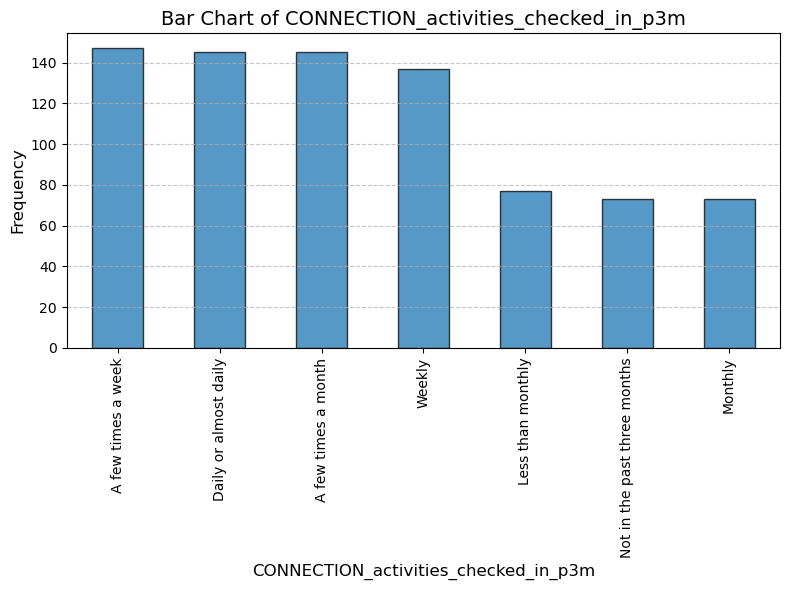

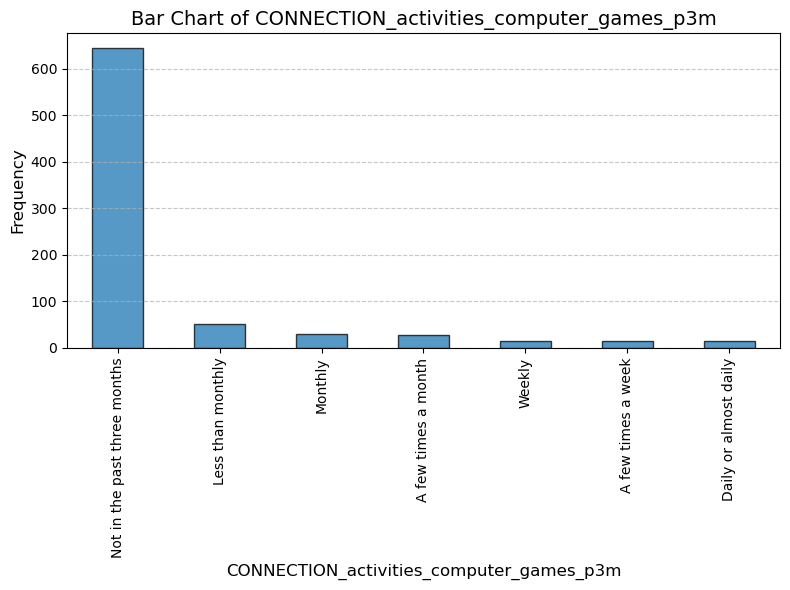

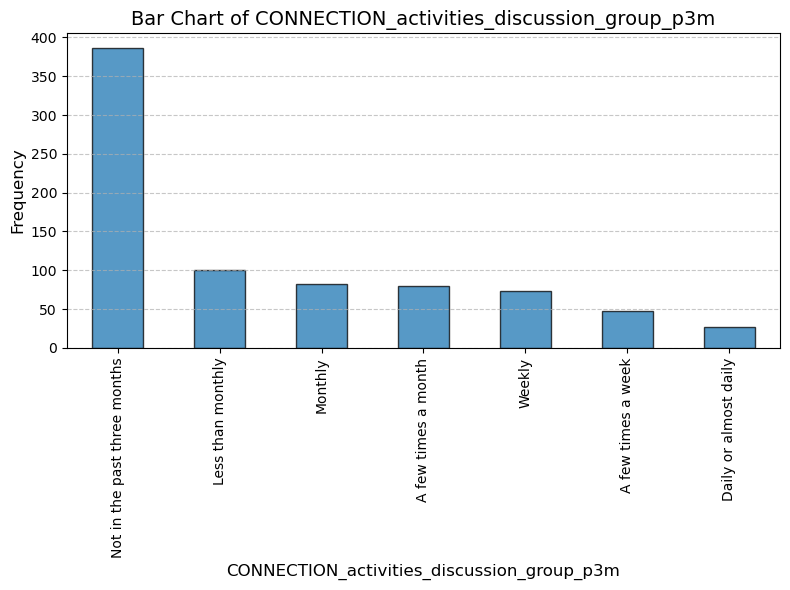

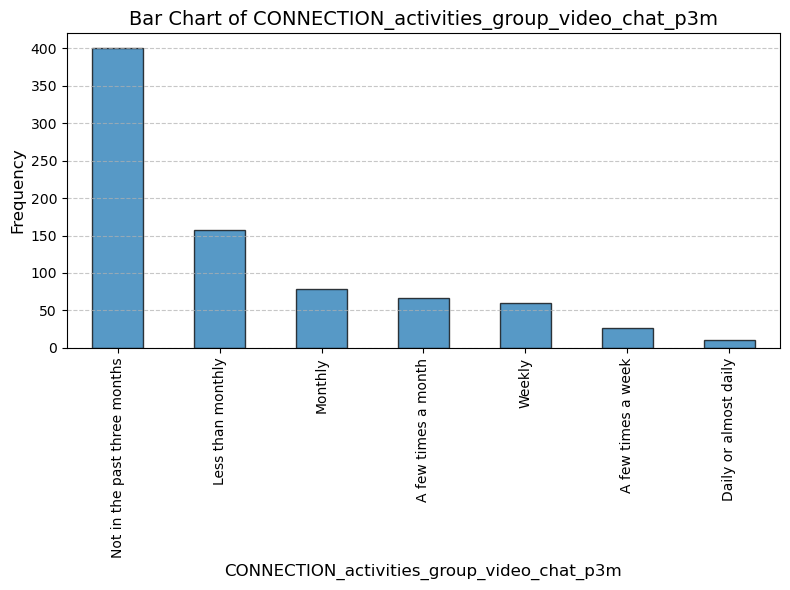

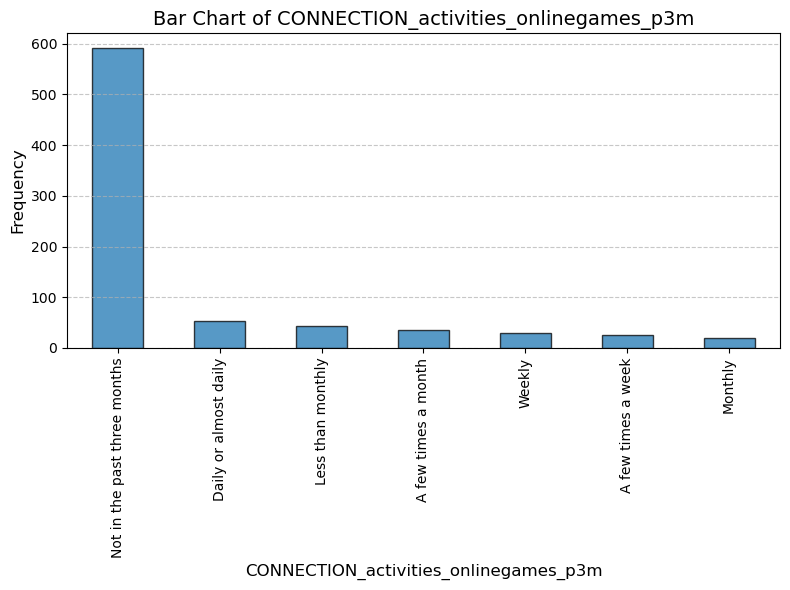

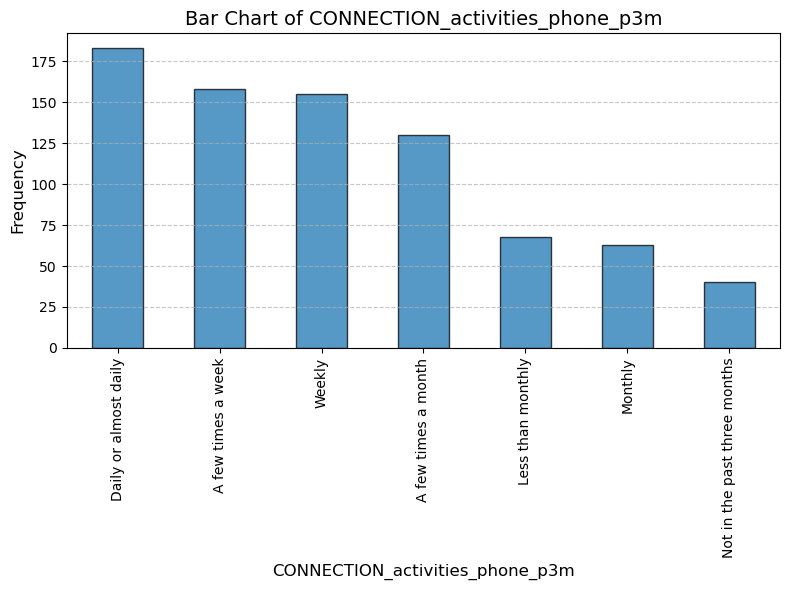

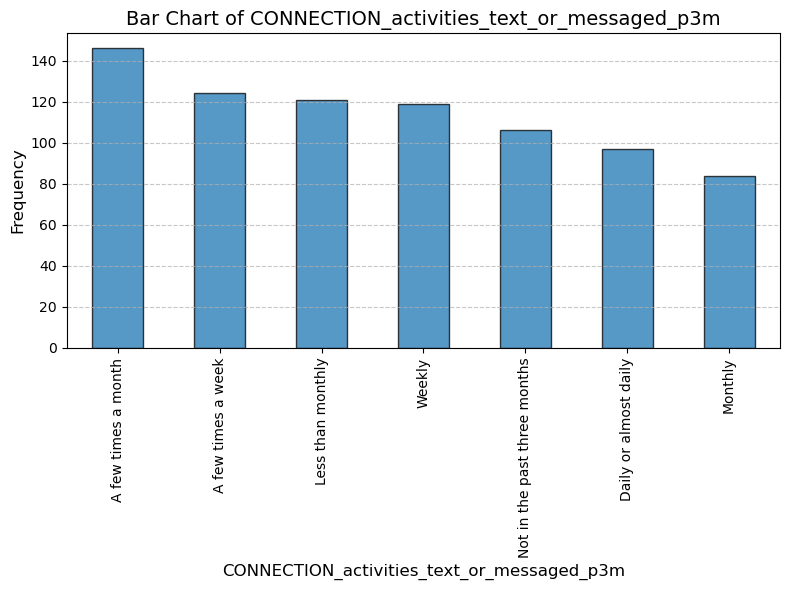

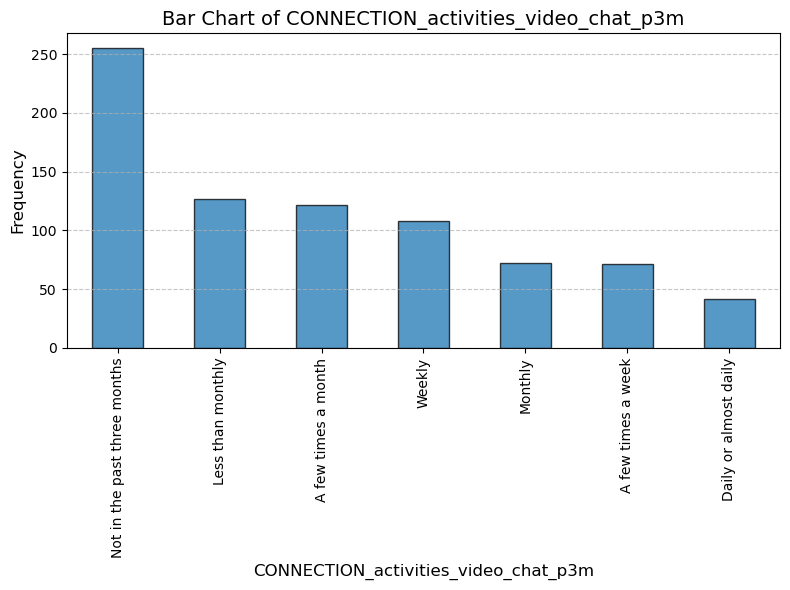

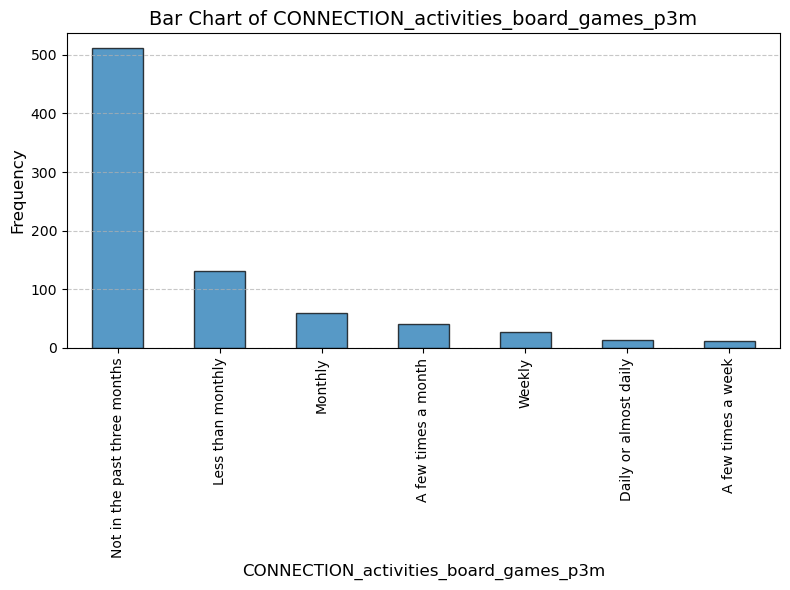

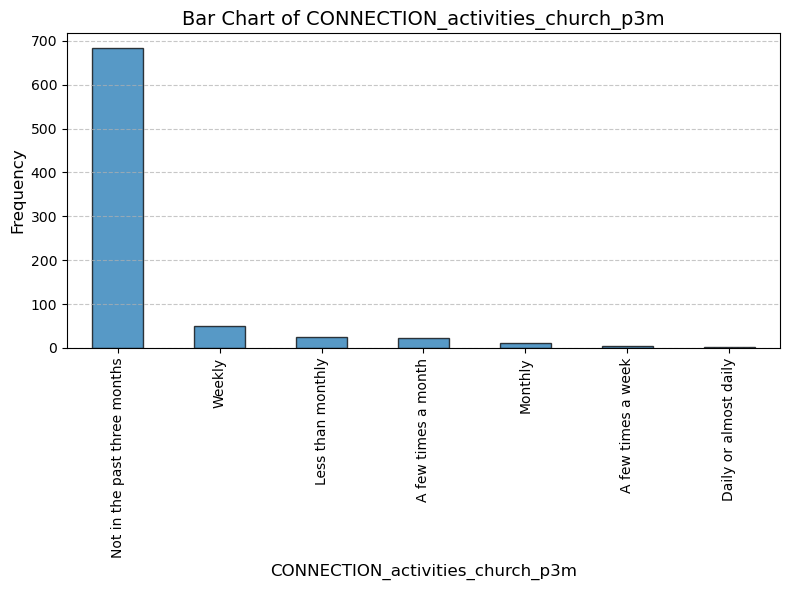

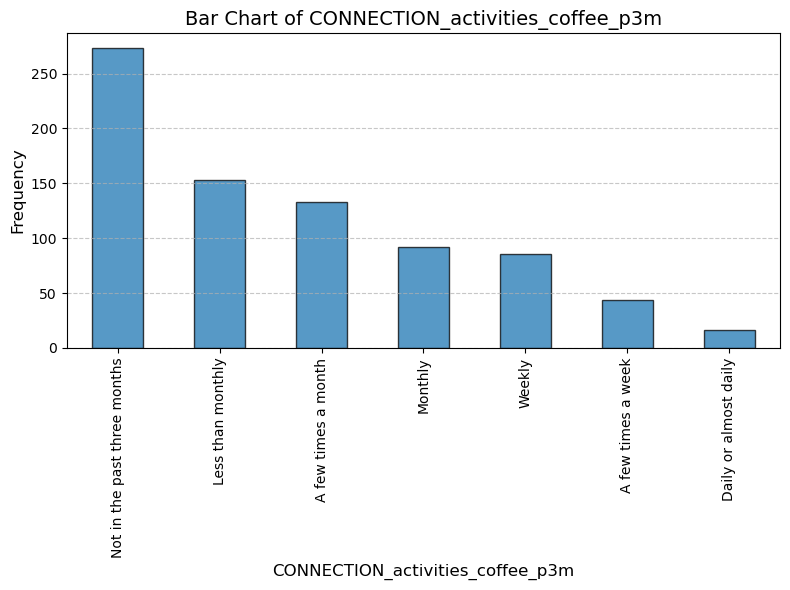

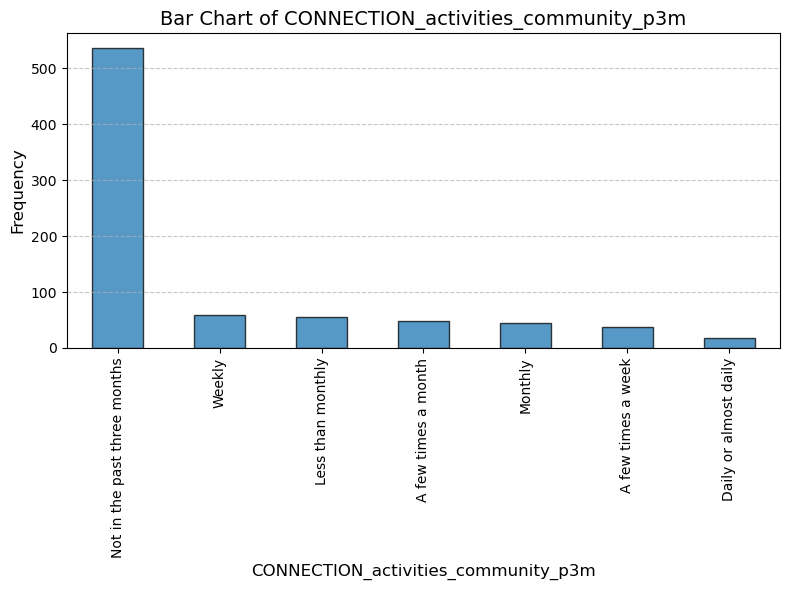

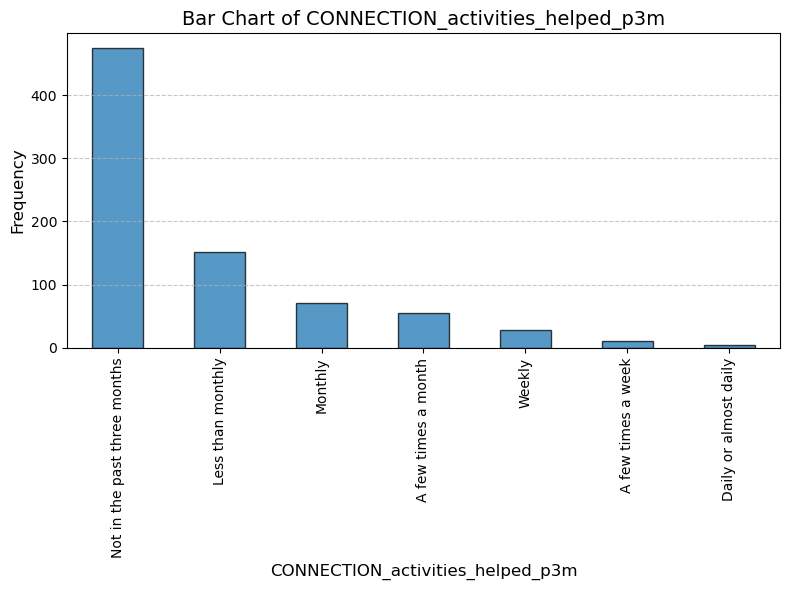

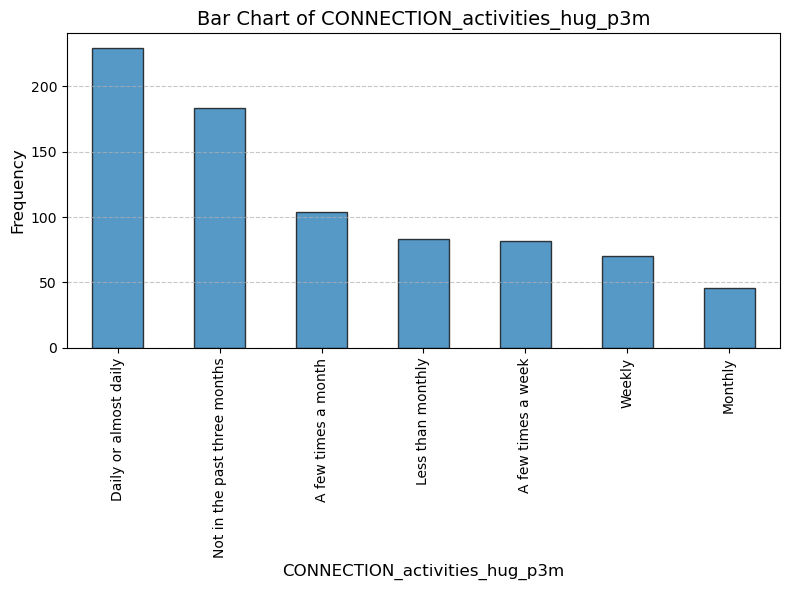

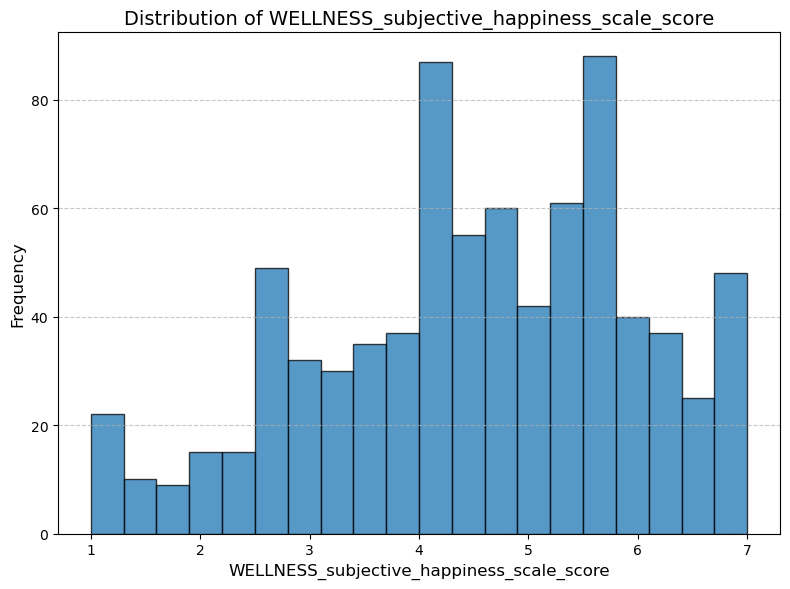

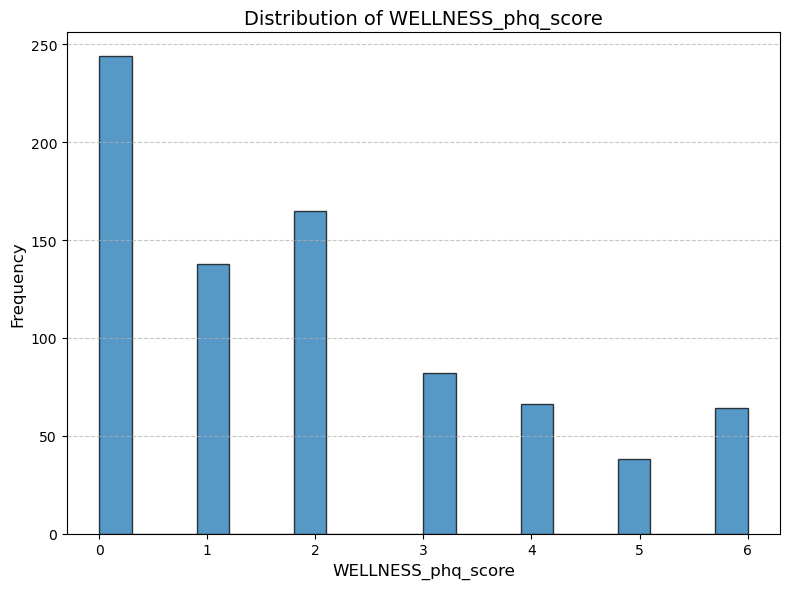

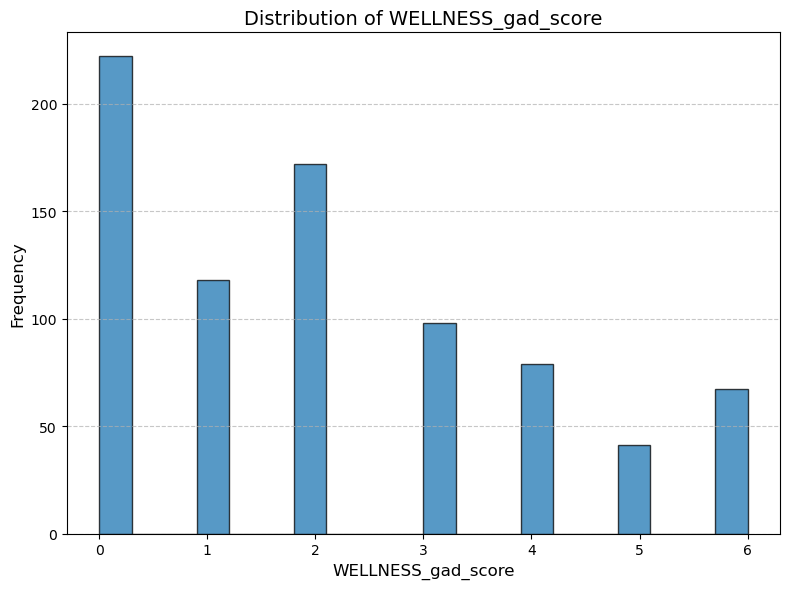

In [3]:
import matplotlib.pyplot as plt

# Function to create visualizations for each variable
def visualize_variable(data, column_name):
    plt.figure(figsize=(8, 6))
    if data[column_name].dtype in ['float64', 'int64']:
        # For numerical data, use histogram
        data[column_name].dropna().plot(kind='hist', bins=20, alpha=0.75, edgecolor='black')
        plt.title(f"Distribution of {column_name}", fontsize=14)
        plt.xlabel(column_name, fontsize=12)
        plt.ylabel("Frequency", fontsize=12)
    else:
        # For categorical data, use bar chart
        data[column_name].value_counts().plot(kind='bar', alpha=0.75, edgecolor='black')
        plt.title(f"Bar Chart of {column_name}", fontsize=14)
        plt.xlabel(column_name, fontsize=12)
        plt.ylabel("Frequency", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Loop through each column in the filtered dataset and create a visualization
for column in filtered_data.columns:
    visualize_variable(filtered_data, column)


## dependent variables(x)

"CONNECTION_activities_checked_in_p3m":  In the PAST THREE MONTH, how often have you... - sent a text/private message to someone just to check in?

"CONNECTION_activities_computer_games_p3m": In the PAST THREE MONTH, how often have you... - played a computer or console (e.g., Wii, Xbox, PlayStation) game with others?

"CONNECTION_activities_discussion_group_p3m": In the PAST THREE MONTH, how often have you... - participated in an online discussion group?

"CONNECTION_activities_group_video_chat_p3m": In the PAST THREE MONTH, how often have you... - had a video chat with a GROUP of friends or family?

"CONNECTION_activities_onlinegames_p3m": In the PAST THREE MONTH, how often have you... - played an online game with others?

"CONNECTION_activities_phone_p3m": In the PAST THREE MONTH, how often have you... - had a phone conversation with a friend or family member?

"CONNECTION_activities_text_or_messaged_p3m": In the PAST THREE MONTH, how often have you... - received a text/private message from someone who was checking in with you?

"CONNECTION_activities_video_chat_p3m": In the PAST THREE MONTH, how often have you... - had a video chat with a friend or family member?

In [4]:
dependent_variables = filtered_data[[
    "CONNECTION_activities_checked_in_p3m",
    "CONNECTION_activities_computer_games_p3m",
    "CONNECTION_activities_discussion_group_p3m",
    "CONNECTION_activities_group_video_chat_p3m",
    "CONNECTION_activities_onlinegames_p3m",
    "CONNECTION_activities_phone_p3m",
    "CONNECTION_activities_text_or_messaged_p3m",
    "CONNECTION_activities_video_chat_p3m",
    "CONNECTION_activities_board_games_p3m",
    "CONNECTION_activities_church_p3m",
    "CONNECTION_activities_coffee_p3m",
    "CONNECTION_activities_community_p3m",
    "CONNECTION_activities_helped_p3m",
    "CONNECTION_activities_hug_p3m"
]]
dependent_variables

,CONNECTION_activities_checked_in_p3m,CONNECTION_activities_computer_games_p3m,CONNECTION_activities_discussion_group_p3m,CONNECTION_activities_group_video_chat_p3m,CONNECTION_activities_onlinegames_p3m,CONNECTION_activities_phone_p3m,CONNECTION_activities_text_or_messaged_p3m,CONNECTION_activities_video_chat_p3m,CONNECTION_activities_board_games_p3m,CONNECTION_activities_church_p3m,CONNECTION_activities_coffee_p3m,CONNECTION_activities_community_p3m,CONNECTION_activities_helped_p3m,CONNECTION_activities_hug_p3m
19,Daily or almost daily,Not in the past three months,Monthly,Less than monthly,Not in the past three months,A few times a week,Weekly,Less than monthly,Not in the past three months,Not in the past three months,A few times a week,Not in the past three months,Less than monthly,Daily or almost daily
21,Less than monthly,Not in the past three months,Not in the past three months,Not in the past three months,Not in the past three months,Daily or almost daily,Weekly,Not in the past three months,Less than monthly,Not in the past three months,Less than monthly,Not in the past three months,Not in the past three months,Daily or almost daily
71,A few times a week,Not in the past three months,Not in the past three months,Not in the past three months,Not in the past three months,Daily or almost daily,A few times a week,A few times a week,Not in the past three months,Not in the past three months,Weekly,Not in the past three months,Not in the past three months,A few times a week
77,A few times a month,Not in the past three months,A few times a month,Not in the past three months,Weekly,A few times a week,A few times a month,Less than monthly,Not in the past three months,Not in the past three months,A few times a month,Not in the past three months,Monthly,A few times a month
78,Weekly,Not in the past three months,A few times a month,Not in the past three months,Weekly,Weekly,Weekly,Less than monthly,Not in the past three months,Not in the past three months,A few times a month,Not in the past three months,A few times a month,Daily or almost daily
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11379,A few times a week,Not in the past three months,Monthly,Monthly,Not in the past three months,A few times a month,Less than monthly,A few times a week,Not in the past three months,Not in the past three months,Weekly,Weekly,Monthly,Not in the past three months
11380,Weekly,Not in the past three months,Monthly,A few times a month,Not in the past three months,Less than monthly,Weekly,A few times a month,A few times a month,Not in the past three months,A few times a week,A few times a week,Weekly,A few times a month
11412,A few times a week,Not in the past three months,Weekly,Monthly,Not in the past three months,Daily or almost daily,Daily or almost daily,Weekly,Less than monthly,Not in the past three months,A few times a week,Less than monthly,Monthly,Daily or almost daily
11428,A few times a month,Not in the past three months,Not in the past three months,Not in the past three months,Not in the past three months,Daily or almost daily,Daily or almost daily,A few times a week,Not in the past three months,Less than monthly,Less than monthly,Not in the past three months,Not in the past three months,A few times a month


In [5]:
Online_dependent_variables = dependent_variables[[
    "CONNECTION_activities_checked_in_p3m",
    "CONNECTION_activities_computer_games_p3m",
    "CONNECTION_activities_discussion_group_p3m",
    "CONNECTION_activities_group_video_chat_p3m",
    "CONNECTION_activities_onlinegames_p3m",
    "CONNECTION_activities_phone_p3m",
    "CONNECTION_activities_text_or_messaged_p3m",
    "CONNECTION_activities_video_chat_p3m"
]]
Online_dependent_variables

,CONNECTION_activities_checked_in_p3m,CONNECTION_activities_computer_games_p3m,CONNECTION_activities_discussion_group_p3m,CONNECTION_activities_group_video_chat_p3m,CONNECTION_activities_onlinegames_p3m,CONNECTION_activities_phone_p3m,CONNECTION_activities_text_or_messaged_p3m,CONNECTION_activities_video_chat_p3m
19,Daily or almost daily,Not in the past three months,Monthly,Less than monthly,Not in the past three months,A few times a week,Weekly,Less than monthly
21,Less than monthly,Not in the past three months,Not in the past three months,Not in the past three months,Not in the past three months,Daily or almost daily,Weekly,Not in the past three months
71,A few times a week,Not in the past three months,Not in the past three months,Not in the past three months,Not in the past three months,Daily or almost daily,A few times a week,A few times a week
77,A few times a month,Not in the past three months,A few times a month,Not in the past three months,Weekly,A few times a week,A few times a month,Less than monthly
78,Weekly,Not in the past three months,A few times a month,Not in the past three months,Weekly,Weekly,Weekly,Less than monthly
...,...,...,...,...,...,...,...,...
11379,A few times a week,Not in the past three months,Monthly,Monthly,Not in the past three months,A few times a month,Less than monthly,A few times a week
11380,Weekly,Not in the past three months,Monthly,A few times a month,Not in the past three months,Less than monthly,Weekly,A few times a month
11412,A few times a week,Not in the past three months,Weekly,Monthly,Not in the past three months,Daily or almost daily,Daily or almost daily,Weekly
11428,A few times a month,Not in the past three months,Not in the past three months,Not in the past three months,Not in the past three months,Daily or almost daily,Daily or almost daily,A few times a week


In [6]:
Offline_dependent_variables = dependent_variables[[
    "CONNECTION_activities_board_games_p3m",
    "CONNECTION_activities_church_p3m",
    "CONNECTION_activities_coffee_p3m",
    "CONNECTION_activities_community_p3m",
    "CONNECTION_activities_helped_p3m",
    "CONNECTION_activities_hug_p3m"
]]
Offline_dependent_variables


,CONNECTION_activities_board_games_p3m,CONNECTION_activities_church_p3m,CONNECTION_activities_coffee_p3m,CONNECTION_activities_community_p3m,CONNECTION_activities_helped_p3m,CONNECTION_activities_hug_p3m
19,Not in the past three months,Not in the past three months,A few times a week,Not in the past three months,Less than monthly,Daily or almost daily
21,Less than monthly,Not in the past three months,Less than monthly,Not in the past three months,Not in the past three months,Daily or almost daily
71,Not in the past three months,Not in the past three months,Weekly,Not in the past three months,Not in the past three months,A few times a week
77,Not in the past three months,Not in the past three months,A few times a month,Not in the past three months,Monthly,A few times a month
78,Not in the past three months,Not in the past three months,A few times a month,Not in the past three months,A few times a month,Daily or almost daily
...,...,...,...,...,...,...
11379,Not in the past three months,Not in the past three months,Weekly,Weekly,Monthly,Not in the past three months
11380,A few times a month,Not in the past three months,A few times a week,A few times a week,Weekly,A few times a month
11412,Less than monthly,Not in the past three months,A few times a week,Less than monthly,Monthly,Daily or almost daily
11428,Not in the past three months,Less than monthly,Less than monthly,Not in the past three months,Not in the past three months,A few times a month


## independent variables(y)

"WELLNESS_subjective_happiness_scale_score": A brief, self-report measure consisting of a few items where participants rate their happiness relative to others or describe their general state of happiness. The scores from the SHS provide an index of subjective well-being or happiness as perceived by the individual. Higher scores indicating greater levels of subjective happiness. Lower scores suggesting lower levels of perceived happiness.

"WELLNESS_phq_score": A score derived from the Patient Health Questionnaire (PHQ), a widely used self-administered tool for assessing mental health, particularly symptoms of depression.

"WELLNESS_gad_score": A score derived from the Generalized Anxiety Disorder (GAD) scale, commonly the GAD-7, which is a widely used tool for assessing the severity of anxiety symptoms.



In [7]:
independent_variables = filtered_data[[
    'WELLNESS_subjective_happiness_scale_score',
    'WELLNESS_phq_score', 
    'WELLNESS_gad_score'
]]
independent_variables

,WELLNESS_subjective_happiness_scale_score,WELLNESS_phq_score,WELLNESS_gad_score
19,5.00,1.0,0.0
21,5.25,1.0,0.0
71,6.00,0.0,0.0
77,6.00,0.0,0.0
78,6.00,0.0,1.0
...,...,...,...
11379,3.00,3.0,4.0
11380,3.50,3.0,2.0
11412,4.75,1.0,2.0
11428,3.75,3.0,2.0


---

## Binary

Low Frequency：0

- Not in the past three months

- Less than monthly

- Monthly


High Frequency：1

- A few times a month

- Weekly

- A few times a week

- Daily or almost daily

In [8]:
frequency_mapping = {
    "Not in the past three months": 0,
    "Less than monthly": 0,
    "Monthly": 0,
    "A few times a month": 1,
    "Weekly": 1,
    "A few times a week": 1,
    "Daily or almost daily": 1
}

# replace
filtered_data[dependent_variables.columns] = dependent_variables.applymap(lambda x: frequency_mapping.get(x, x))

# data
filtered_data

/tmp/ipykernel_86/4068764100.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  filtered_data[dependent_variables.columns] = dependent_variables.applymap(lambda x: frequency_mapping.get(x, x))


,CONNECTION_activities_checked_in_p3m,CONNECTION_activities_computer_games_p3m,CONNECTION_activities_discussion_group_p3m,CONNECTION_activities_group_video_chat_p3m,CONNECTION_activities_onlinegames_p3m,CONNECTION_activities_phone_p3m,CONNECTION_activities_text_or_messaged_p3m,CONNECTION_activities_video_chat_p3m,CONNECTION_activities_board_games_p3m,CONNECTION_activities_church_p3m,CONNECTION_activities_coffee_p3m,CONNECTION_activities_community_p3m,CONNECTION_activities_helped_p3m,CONNECTION_activities_hug_p3m,WELLNESS_subjective_happiness_scale_score,WELLNESS_phq_score,WELLNESS_gad_score
19,1,0,0,0,0,1,1,0,0,0,1,0,0,1,5.00,1.0,0.0
21,0,0,0,0,0,1,1,0,0,0,0,0,0,1,5.25,1.0,0.0
71,1,0,0,0,0,1,1,1,0,0,1,0,0,1,6.00,0.0,0.0
77,1,0,1,0,1,1,1,0,0,0,1,0,0,1,6.00,0.0,0.0
78,1,0,1,0,1,1,1,0,0,0,1,0,1,1,6.00,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11379,1,0,0,0,0,1,0,1,0,0,1,1,0,0,3.00,3.0,4.0
11380,1,0,0,1,0,0,1,1,1,0,1,1,1,1,3.50,3.0,2.0
11412,1,0,1,0,0,1,1,1,0,0,1,0,0,1,4.75,1.0,2.0
11428,1,0,0,0,0,1,1,1,0,0,0,0,0,1,3.75,3.0,2.0


In [9]:
for col in filtered_data.columns:
    col_summary = filtered_data[col].value_counts(dropna=False)
    if len(col_summary)<11:
        print(col_summary, "\n")
    else:
        print(col, filtered_data[col].shape, "\n")

CONNECTION_activities_checked_in_p3m
1    574
0    223
Name: count, dtype: int64 

CONNECTION_activities_computer_games_p3m
0    724
1     73
Name: count, dtype: int64 

CONNECTION_activities_discussion_group_p3m
0    569
1    228
Name: count, dtype: int64 

CONNECTION_activities_group_video_chat_p3m
0    635
1    162
Name: count, dtype: int64 

CONNECTION_activities_onlinegames_p3m
0    654
1    143
Name: count, dtype: int64 

CONNECTION_activities_phone_p3m
1    626
0    171
Name: count, dtype: int64 

CONNECTION_activities_text_or_messaged_p3m
1    486
0    311
Name: count, dtype: int64 

CONNECTION_activities_video_chat_p3m
0    454
1    343
Name: count, dtype: int64 

CONNECTION_activities_board_games_p3m
0    703
1     94
Name: count, dtype: int64 

CONNECTION_activities_church_p3m
0    719
1     78
Name: count, dtype: int64 

CONNECTION_activities_coffee_p3m
0    518
1    279
Name: count, dtype: int64 

CONNECTION_activities_community_p3m
0    636
1    161
Name: count, dtype: in

In [10]:
#online model with WELLNESS_gad_score as y
import statsmodels.api as sm

# Define independent variables
independent_vars = filtered_data[[
    "CONNECTION_activities_checked_in_p3m",
    "CONNECTION_activities_computer_games_p3m",
    "CONNECTION_activities_discussion_group_p3m",
    "CONNECTION_activities_group_video_chat_p3m",
    "CONNECTION_activities_onlinegames_p3m",
    "CONNECTION_activities_phone_p3m",
    "CONNECTION_activities_text_or_messaged_p3m",
    "CONNECTION_activities_video_chat_p3m"
]]

# Encode categorical variables
independent_vars_encoded = pd.get_dummies(independent_vars, drop_first=True)

# Add a constant for the intercept
independent_vars_encoded = sm.add_constant(independent_vars_encoded)

# Dependent variable
dependent_var = filtered_data['WELLNESS_gad_score']

# Fit the linear regression model
model = sm.OLS(dependent_var, independent_vars_encoded).fit()

# Output the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:     WELLNESS_gad_score   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     3.819
Date:                Tue, 26 Nov 2024   Prob (F-statistic):           0.000204
Time:                        03:23:12   Log-Likelihood:                -1623.8
No. Observations:                 797   AIC:                             3266.
Df Residuals:                     788   BIC:                             3308.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [35]:
##offline model with WELLNESS_gad_score as y
import statsmodels.api as sm

# Select offline activities
offline_vars = filtered_data[[
    "CONNECTION_activities_board_games_p3m",
    "CONNECTION_activities_church_p3m",
    "CONNECTION_activities_coffee_p3m",
    "CONNECTION_activities_community_p3m",
    "CONNECTION_activities_helped_p3m",
    "CONNECTION_activities_hug_p3m"
]]

# Handle missing values and encode categories
offline_vars.fillna("Unknown", inplace=True)
offline_vars_encoded = pd.get_dummies(offline_vars, drop_first=True)

# Ensure numeric data
offline_vars_encoded = offline_vars_encoded.astype(float)

# Add a constant for the intercept
offline_vars_encoded = sm.add_constant(offline_vars_encoded)

# Dependent variable
dependent_var = filtered_data['WELLNESS_gad_score']

# Fit the model
model = sm.OLS(dependent_var, offline_vars_encoded).fit()

# Output the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:     WELLNESS_gad_score   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     1.957
Date:                Tue, 26 Nov 2024   Prob (F-statistic):           0.000791
Time:                        04:19:49   Log-Likelihood:                -1603.6
No. Observations:                 797   AIC:                             3281.
Df Residuals:                     760   BIC:                             3454.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                                                                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

/tmp/ipykernel_86/1999467667.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  offline_vars.fillna("Unknown", inplace=True)
